In [1]:
# Compute the committor for LJ7 using FEM
import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files
from distmesh import *
from FEM_TPT import *

beta = 9

In [2]:
def read_FEdata_files(beta):
    fname = "Data/LJ7free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ7free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix


def read_Mdata_files(entry,beta):
    fname = "Data/LJ7_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ7_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix
    
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y
    
def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

#     for i in range(1,4):
#         for j in range(4):
#             grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

#     for i in range(4):
#         for j in range(1,4):
#             grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
#     grad_x = grad_x/dx
#     grad_y = grad_y/dy
    
    return val #,grad_x,grad_y

In [3]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)

129
129
4.8150613961e-02
6.2338532973e-02
 -4.2840838723e-01
5.7348701998e+00
 -2.7215345455e+00
5.2577976751e+00
129
129
0.048150613961
0.062338532973
-0.42840838723
5.7348701998
-2.7215345455
5.2577976751


In [4]:
FE, bicubic_matrix = read_FEdata_files(beta)
M11, M11_bicubic_matrix = read_Mdata_files(11,beta)
M12, M12_bicubic_matrix = read_Mdata_files(12,beta)
M22, M22_bicubic_matrix = read_Mdata_files(22,beta)


(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [5]:
# visualize the free energy

CV1grid = np.linspace(val1_min,val1_max,N1)
CV2grid = np.linspace(val2_min,val2_max,N2)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

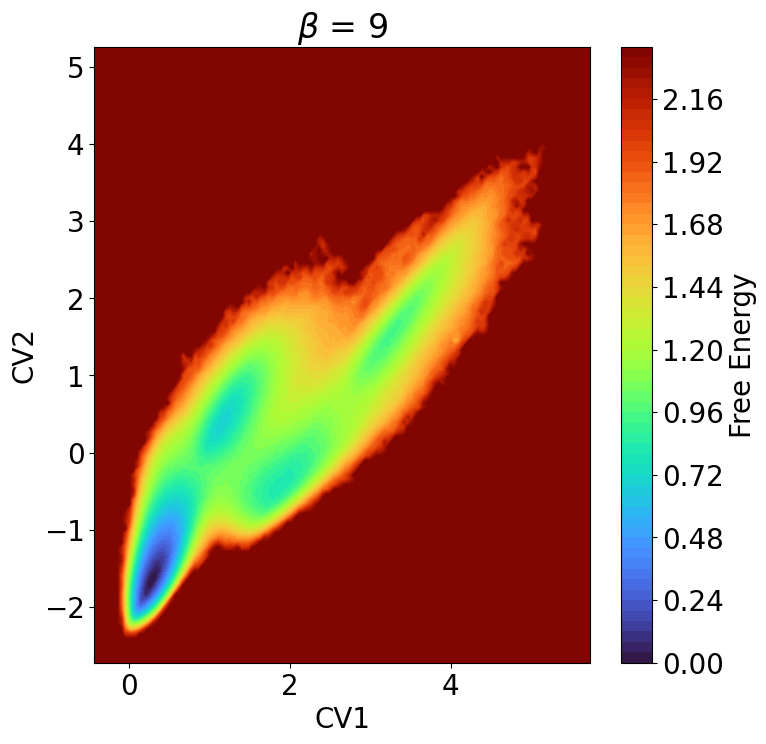

In [6]:
fig_name = "Figures/FE_LJ7_MLCV_SortD2_beta" + str(beta)+".pdf"
contourf_func(FE,beta,CV1grid,CV2grid,"Free Energy",fig_name)


In [7]:
# MLCV
dirCVdata_name = "MLCV_SortD2_data/"
A1 = np.loadtxt(dirCVdata_name+'A1.csv', delimiter=',', dtype=float)
A2 = np.loadtxt(dirCVdata_name+'A2.csv', delimiter=',', dtype=float)
A3 = np.loadtxt(dirCVdata_name+'A3.csv', delimiter=',', dtype=float)
b1 = np.loadtxt(dirCVdata_name+'b1.csv', delimiter=',', dtype=float)
b2 = np.loadtxt(dirCVdata_name+'b2.csv', delimiter=',', dtype=float)
b3 = np.loadtxt(dirCVdata_name+'b3.csv', delimiter=',', dtype=float)

def myELU(x):
    zz = np.zeros_like(x)
    return np.maximum(x,zz) + np.minimum(np.exp(x)-1.0,zz)

def sortdist2(xy):
    Na = 7 # 21 = 7*6/2
    d2 = np.zeros((21,))
    count = 0
    for j in range(1,Na):
        for k in range(j):
            d2[count] = (xy[j] - xy[k])**2 + (xy[j+Na] - xy[k+Na])**2
            count = count + 1
    return np.sort(d2)        
            
def MargotCV(d2):
    w1 = myELU(np.matmul(A1,d2) + b1)
    w2 = myELU(np.matmul(A2,w1) + b2)
    w3 = np.matmul(A3,w2) + b3
    return w3

# load the list of minima and saddles of LJ7 in 2D
XYlist = np.loadtxt('Data/XYlist_min_sad.csv', delimiter=',', dtype=float)
Nlist = np.size(XYlist,axis = 0)
CVlist = np.zeros((Nlist,2))
for j in range(Nlist):
    d2 = sortdist2(XYlist[j,:])
    cv = MargotCV(d2)
    CVlist[j,0] = cv[0]
    CVlist[j,1] = cv[1]


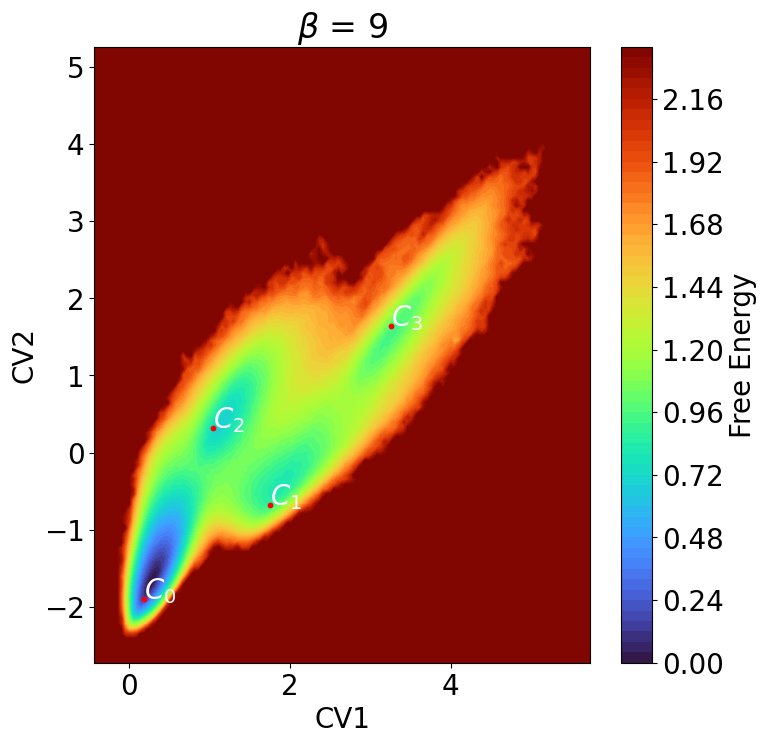

In [8]:

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')

cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()

for j in range(4):
    plt.scatter(CVlist[j,0],CVlist[j,1],s = 10, c = 'red')
    plt.text(CVlist[j, 0], CVlist[j, 1], fr"$C_{j}$", color='white')

#axes.set_aspect(1)
fig_name = "Figures/FE_LJ7_MLCV_SortD2_confs_beta" + str(beta)+".pdf"
plt.savefig(fig_name)

/var/folders/tj/20hjj3p93ls3rkc91pc6nmb40000gn/T/ipykernel_4168/675381726.py:18: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  level_set = cA.allsegs[0]


67


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

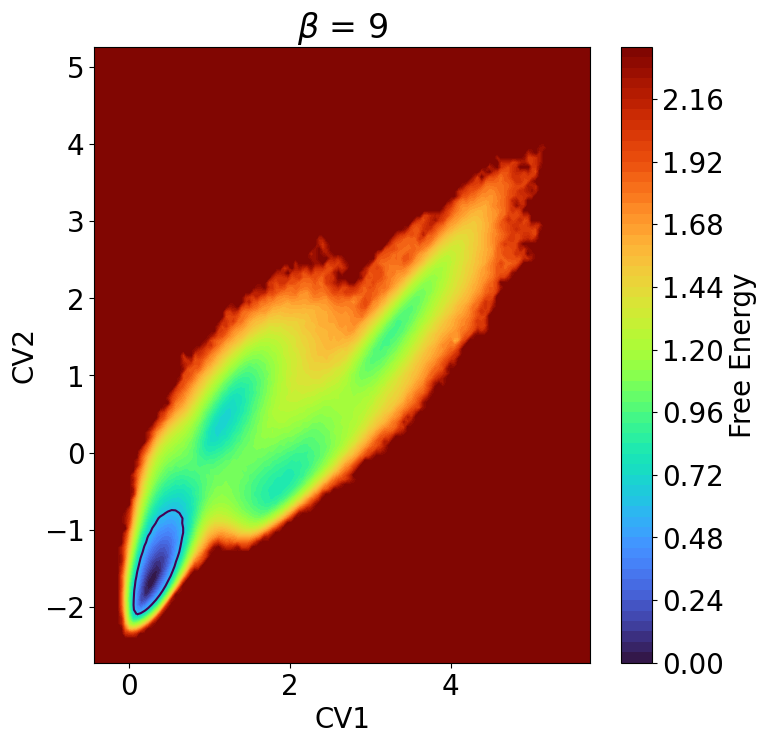

In [9]:
# === Imports and Setup ===
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
h = 0.02  # Reparametrization scale
feA = 0.6  # Free energy level for region A
FEmax = np.max(FE)

# === Region A Definition (A = {F ≤ feA}) ===
cA = plt.contour(CV1grid, CV2grid, FE, [feA])
Abdry = cA.allsegs[0][0]               # Extract outermost level set
Abdry = reparametrization(Abdry, h)    # Reparametrize the boundary

# === Region B Definition via Ellipse ===
jc, jaux = 3, 6
vec0 = CVlist[jc, :] - CVlist[jaux, :]
norm0 = np.linalg.norm(vec0)
vec0 = vec0 / norm0
vec1 = np.array([-vec0[1], vec0[0]])

r0 = norm0 * 0.4
r1 = 0.4
Nt = 50
t = np.linspace(0, 2 * np.pi, Nt)

x = CVlist[jc, 0] + (r0 * vec0[0] * np.cos(t) + vec1[0] * r1 * np.sin(t))
y = CVlist[jc, 1] + (r0 * vec0[1] * np.cos(t) + vec1[1] * r1 * np.sin(t))

B_ellipse_points = np.stack((x, y), axis=1)
Bbdry = reparametrization(B_ellipse_points, h)  # Reparametrize B's boundary

# === Outer Boundary Definition (O = {F ≤ 0.95 * FEmax}) ===
Odry = plt.contour(CV1grid, CV2grid, FE, [FEmax * 0.95])
Obdry = Odry.allsegs[0][0]
Obdry = reparametrization(Obdry, h)

# === Define Bellipse Function (B(x, y) ≤ 1 means inside B region) ===
x0, y0 = CVlist[jc, 0], CVlist[jc, 1]
vx, vy = vec0[0], vec0[1]

def Bellipse(x, y):
    aux1 = ((x - x0) * vx + (y - y0) * vy) / r0
    aux2 = ((x - x0) * vy - (y - y0) * vx) / r1
    return aux1**2 + aux2**2

# === Plotting ===
plt.figure(figsize=(8, 8))
plt.contourf(CV1grid, CV2grid, FE, levels=60, cmap='turbo')

# Color bar
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)

# Labels and title
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))

# Scatter all critical boundaries
plt.scatter(CVlist[:, 0], CVlist[:, 1], s=10, c='red')  # Original CV points
plt.scatter(Abdry[:, 0], Abdry[:, 1], s=10, c='green', label="A boundary")
plt.scatter(Bbdry[:, 0], Bbdry[:, 1], s=10, c='green', label="B boundary")
plt.scatter(Obdry[:, 0], Obdry[:, 1], s=10, c='green', label="Outer boundary")

# Plot elliptical outline explicitly
plt.plot(x, y, color="black", linewidth=2)

# Plot B level set
cv1mesh, cv2mesh = np.meshgrid(CV1grid, CV2grid)
Bfunc = Bellipse(cv1mesh, cv2mesh)
plt.contour(cv1mesh, cv2mesh, Bfunc, [1.0], cmap='Wistia')

# Debug Prints
print("FEmax =", FEmax)
print("size(Abdry) =", np.shape(Abdry))
print("size(Bbdry) =", np.shape(Bbdry))
print("size(Obdry) =", np.shape(Obdry))
print("x0 =", x0, "y0 =", y0)
print("r0 =", r0, "r1 =", r1)
print("vec0 =", vec0)
print("vec1 =", vec1)
print("min(Bfunc) =", np.min(Bfunc))

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
dirname = "FEMdataBETA"+str(beta)+"/"
Abdry.tofile(dirname +'Abdry.csv', sep = ',')
Bbdry.tofile(dirname +'Bbdry.csv', sep = ',')
Obdry.tofile(dirname +'Obdry.csv', sep = ',')

In [10]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    scale = 0.002
    N2,N1 = np.shape(func)
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
    plt.savefig(fig_name)

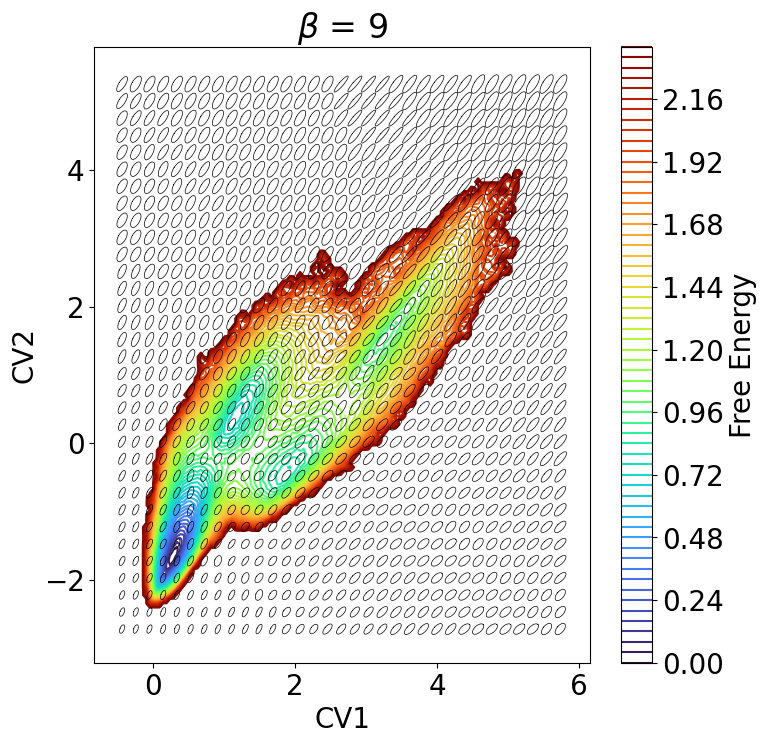

In [11]:
step = 4

fig_name = f"Figures/LJ7_FE_DiffMatr_MLCV_SortD2_beta{beta}.pdf"
visualize_diffusion_matrix(FE,M11,M12,M22,beta,step,CV1grid,CV2grid,"Free Energy",fig_name)

OmegaAB: Npts =  17584  Ntri =  32274
A: NptsA =  1691  NtriA =  3068
B: NptsB =  2920  NtriB =  5376


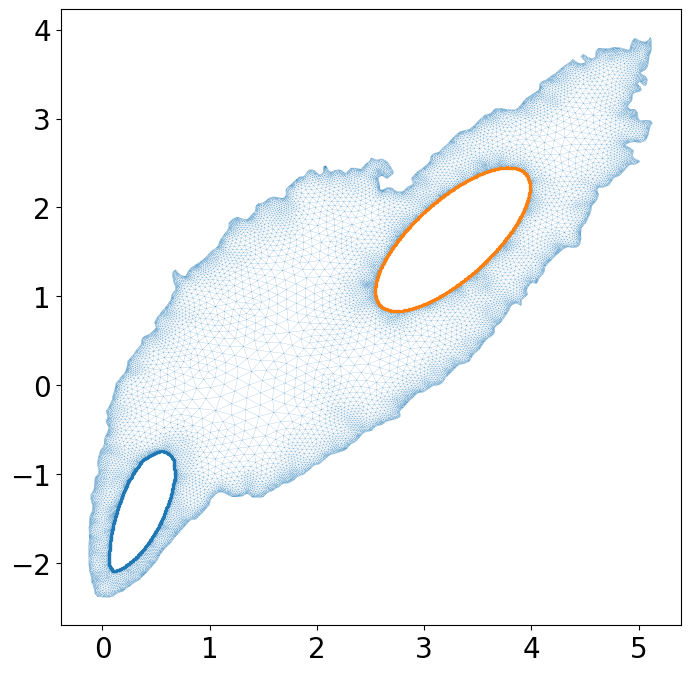

In [12]:
# The triangulation is done using Darren Engwirda's triangulation package mesh2D
# https://github.com/dengwirda/mesh2d?tab=readme-ov-file

dirname = "FEMdataBETA"+str(beta)+"/"

# Read the triangulation files
Aind = np.loadtxt(dirname +"Abdry_idx.csv", delimiter=',', dtype=np.int64)
Bind = np.loadtxt(dirname +"Bbdry_idx.csv", delimiter=',', dtype=np.int64)
pts = np.loadtxt(dirname +"pts.csv", delimiter=',', dtype=float)
ptsA = np.loadtxt(dirname +"ptsA.csv", delimiter=',', dtype=float)
ptsB = np.loadtxt(dirname +"ptsB.csv", delimiter=',', dtype=float)
tri = np.loadtxt(dirname +"tri.csv", delimiter=',', dtype=np.int64)
triA = np.loadtxt(dirname +"triA.csv", delimiter=',', dtype=np.int64)
triB = np.loadtxt(dirname +"triB.csv", delimiter=',', dtype=np.int64)

Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
NptsA = np.size(ptsA,axis = 0)
NtriA = np.size(triA,axis = 0)
NptsB = np.size(ptsB,axis = 0)
NtriB = np.size(triB,axis = 0)

print("OmegaAB: Npts = ",Npts," Ntri = ",Ntri)
print("A: NptsA = ",NptsA," NtriA = ",NtriA)
print("B: NptsB = ",NptsB," NtriB = ",NtriB)

plt.figure(figsize=(8,8))
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
# plt.savefig('LJ72D_trimesh_ABellipses.pdf')


In [13]:
# ise the bicubic interpolation to interpolate the free energy and the diffusion matrix 
# to the nodes of the triangulated mesh
Fpts = np.zeros((Npts,))
M11pts = np.zeros((Npts,))
M12pts = np.zeros((Npts,))
M22pts = np.zeros((Npts,))
FptsA = np.zeros((NptsA,))
FptsB = np.zeros((NptsB,))

for j in range(Npts):
    Fpts[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M11pts[j] = bicubic_interpolation(M11_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M12pts[j] = bicubic_interpolation(M12_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M22pts[j] = bicubic_interpolation(M22_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    
for j in range(NptsA):
    FptsA[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsA[j,0],ptsA[j,1])

for j in range(NptsB):
    FptsB[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsB[j,0],ptsB[j,1])

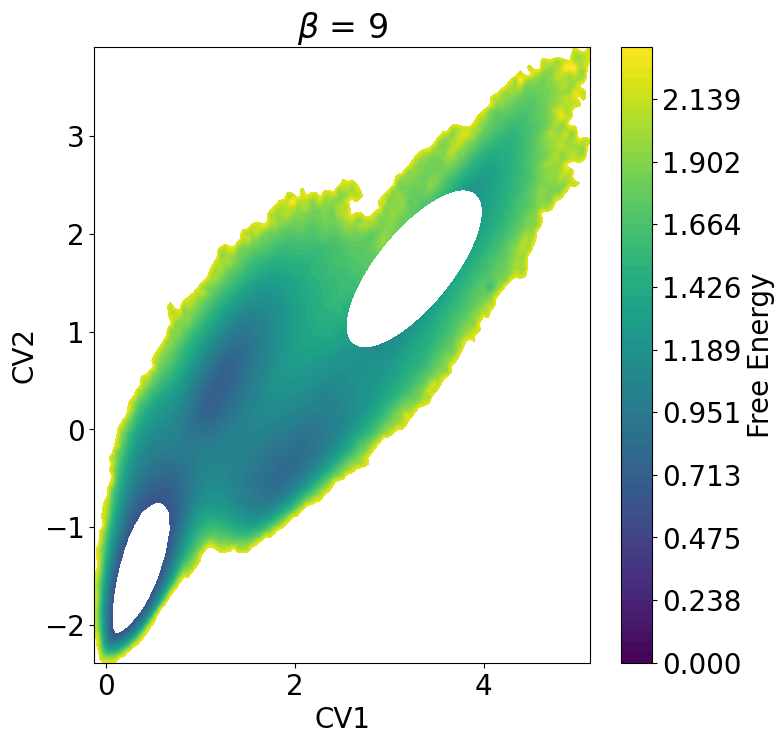

In [14]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.linspace(np.min(FE),np.max(FE),60) )
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


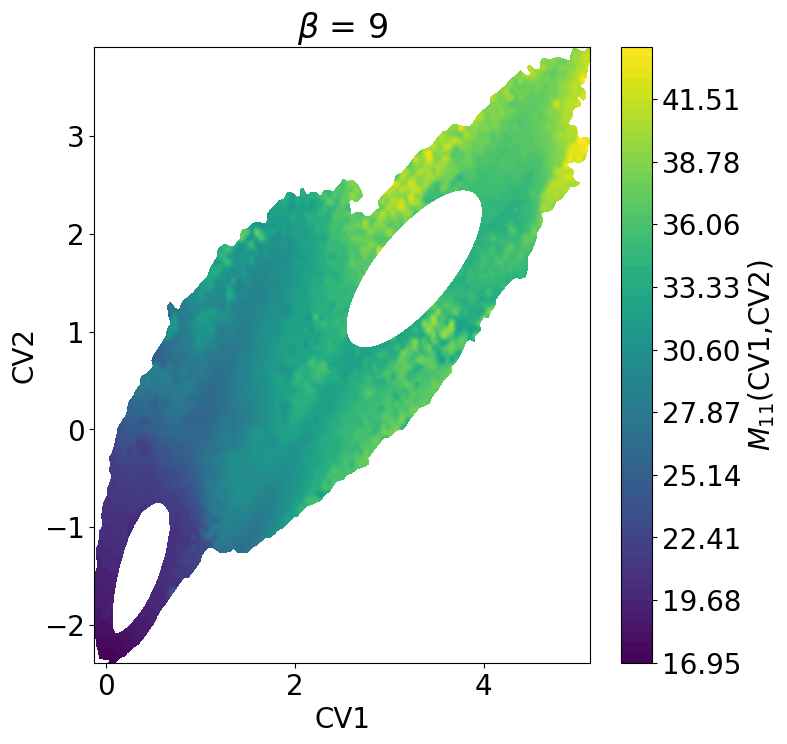

In [15]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M11pts,np.linspace(np.min(M11),np.max(M11),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{11}$(CV1,CV2)', size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


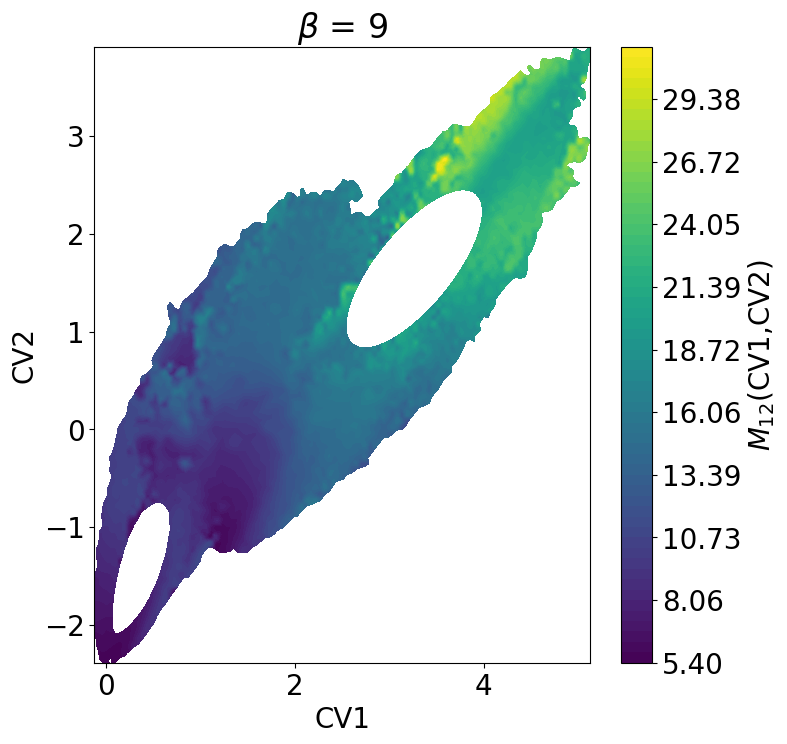

In [16]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M12pts,np.linspace(np.min(M12),np.max(M12),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{12}$(CV1,CV2)', size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


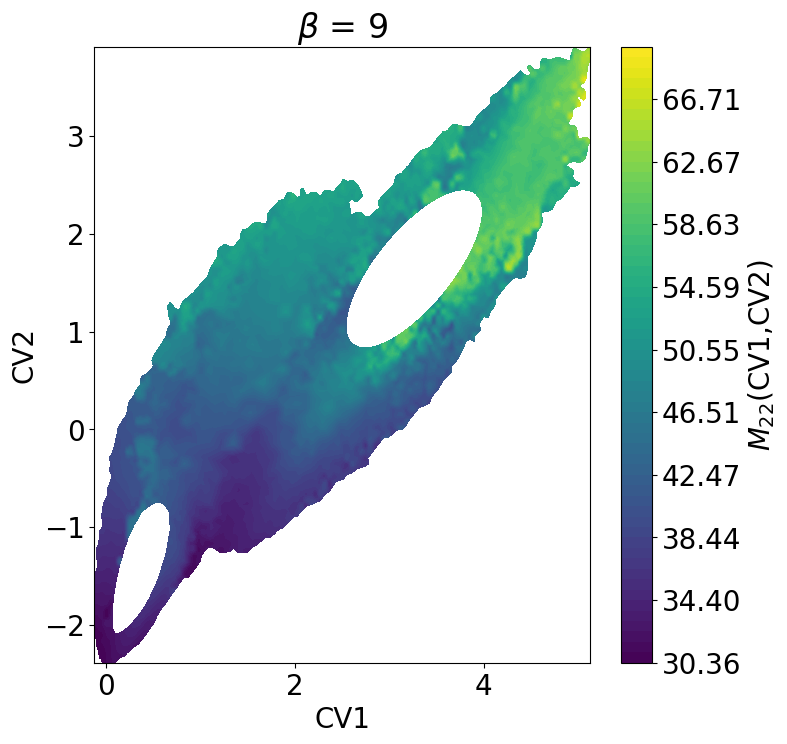

In [17]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M22pts,np.linspace(np.min(M22),np.max(M22),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{22}$(CV1,CV2)', size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


In [18]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)


In [19]:
print(np.min(q))
print(np.max(q))

print(pts.shape, q.shape, tri.shape)
np.savez("Data/Committor_SortDistSquared_BETA"+str(beta) + '.npz', points = pts, committor = q, tri = tri, CVlist = CVlist)

0.0
1.0
(17584, 2) (17584,) (32274, 3)


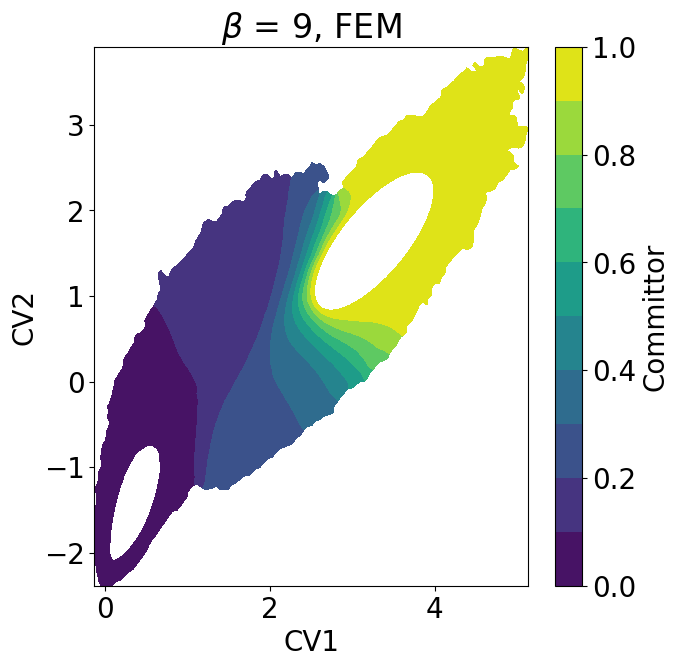

In [20]:
plt.figure(figsize=(7,7))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
# plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# for j in range(8):
#     plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'black')
plt.colorbar(label="Committor", orientation="vertical")
plt.title(r'$\beta$' + ' = ' + str(beta) + ', FEM')
plt.xlabel("CV1")
plt.ylabel("CV2")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
plt.savefig('Figures/FEM_LJ72D_committor_SortD_beta' + str(beta)+'.pdf')

In [ ]:
print(pts.shape, q.shape, tri.shape)
np.savez("Data/Committor_SortDistSquared_BETA"+str(beta) + '.npz', points = pts, committor = q, tri = tri, CVlist = CVlist)

In [ ]:
class LJ7_2(nn.Module):
    """Feedfoward neural network with 2 hidden layer"""
    def __init__(self, in_size, hidden_size,hidden_size2, out_size):
        super().__init__()
        # 1st hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # 2nd hidden layer
        self.linear2 = nn.Linear(hidden_size,hidden_size2)
        self.linear3 = nn.Linear(hidden_size2,hidden_size2)
        # output layer
        self.linear4 = nn.Linear(hidden_size2, out_size)
        
    def forward(self, xb):
        # Get information from the data
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        relu = nn.ReLU()
        out = relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        # apply activation function again
        out = relu(out)
        # last hidden layer 
        out = self.linear3(out)
        
        out = relu(out)
        # last hidden layer 
        out = self.linear4(out)
        
        #sigmoid function
        out = torch.sigmoid(out)
        return out

In [ ]:
beta = 7
fname = "Data/Committor_SortDistSquared_BETA"+str(beta) + '.npz'
inData = np.load(fname)
pts = inData["points"]
Q = inData["committor"]
tri = inData['tri']
CVlist = inData['CVlist']
print(f"Shape of trajectory data:{pts.shape}")
train_data = torch.tensor(pts,dtype=torch.float32)
Q = torch.tensor(Q,dtype=torch.float32)
# ptsA = torch.tensor(np.loadtxt("FEMdataBETA" + str(beta) +"/ptsA.csv", delimiter=','), dtype=torch.float32)
# ptsB = torch.tensor(np.loadtxt("FEMdataBETA" + str(beta) +"/ptsB.csv", delimiter=','), dtype=torch.float32)

ptsA = torch.tensor(np.loadtxt(dirname +"ptsA.csv", delimiter=',', dtype=float), dtype=torch.float32)
ptsB = torch.tensor(np.loadtxt(dirname +"ptsB.csv", delimiter=',', dtype=float), dtype=torch.float32)

train_data = torch.cat((train_data, ptsA, ptsB), 0)
Q = torch.cat((Q, torch.zeros(len(ptsA)), torch.ones(len(ptsB))), 0)

# initialization
input_size = 2
output_size = 1
if beta == 5:
    model = LJ7_2(input_size,10,10,output_size)
if beta == 7:
    model = LJ7_2(input_size,25,25,output_size)
if beta == 9:
    model = LJ7_2(input_size,40,40,output_size)
save_folder = "Data/Committor_LJ7_SortDistSquared_BETA"+str(beta)

In [ ]:
for name, param in model.named_parameters():
    shape_str = ",".join(map(str, param.shape))
    filename = os.path.join(save_folder, f"{name.replace('.', '_')}_[{shape_str}].csv")

    if os.path.exists(filename):
        param_data = np.loadtxt(filename, delimiter=",")  # Load CSV data
        param_data = torch.tensor(param_data, dtype=param.dtype)  # Convert to tensor

        # **Fix shape mismatches**
        if param.shape != param_data.shape:
            if len(param.shape) == 2 and len(param_data.shape) == 1:
                param_data = param_data.view(param.shape)  # Reshape 1D -> 2D
            elif len(param.shape) == 1 and param_data.numel() == 1:
                param_data = param_data.view(1)  # Reshape scalar -> (1,)
            else:
                print(f"Skipping {name} due to incompatible shape {param_data.shape}")

        # Load into model if shape matches
        if param.shape == param_data.shape:
            param.data.copy_(param_data)
            print(f"Loaded: {filename}")
        else:
            print(f"Shape mismatch for {name}: expected {param.shape}, got {param_data.shape}")
    else:
        print(f"File not found: {filename}")

# Set model to evaluation mode
model.eval()

q_NN = model(train_data)

In [ ]:
def read_bins_data(fname):
    # read free energy
    bins = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            # print(line)
            values = [int(value) for value in line.split()]
            # print(values)
            bins.append(values)
        print(np.shape(bins))
        bins = np.array(bins)
        print(np.shape(bins))
    
    return bins

In [ ]:
fname = "Data/RtrajStochControl/Rtraj_bins_beta"+str(beta)+".txt"
bins = read_bins_data(fname)
muR = np.array(np.transpose(bins),dtype = float)
Z = np.sum(muR)*h1*h2
print(Z)
muR = muR/Z
for i in range(N2):
    for j in range(N1):
        if bins[j,i] == 0:
            muR[i,j] = np.nan

In [ ]:
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,muR,levels = 60, cmap = 'coolwarm')
cbar = plt.colorbar()
cbar.set_label(r'$\mu_R$', size=20)
plt.contour(CV1grid,CV2grid,FE7, cmap = 'turbo', levels=10, linewidths=0.8) #cmap='turbo')
if beta == 9:
    plt.tricontour(train_data[:,0].detach(), train_data[:,1].detach(),q_NN[:,0].detach(),np.array([1.0e-4,0.9999]),colors = 'black', s = 3.5)
else:
    plt.tricontour(train_data[:,0].detach(), train_data[:,1].detach(),q_NN[:,0].detach(),np.array([1.0e-3,0.999]),colors = 'black', s = 3.5)
Nmin = 4
for j in range(4):
    plt.scatter(CVlist[j,0],CVlist[j,1],s = 20, c = 'red')
    plt.text(CVlist[j, 0]-0.15, CVlist[j, 1], fr"$C_{j}$", color='black')

plt.xlabel(r"CV1")
plt.ylabel(r"CV2")
# plt.ylim([-2,1.25])
plt.title(r'$\beta$' + ' = ' + str(beta) + ', sort[$d^2$], LJ7')
axes=plt.gca()
axes.set_facecolor('linen')
figname = "Figures/ProbDensityRtraj_LJ7_sortDist_beta"+str(beta)+".pdf"
plt.savefig(figname)